In [9]:
#!pip install tensorflow
import os
import cv2
# import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [11]:
%matplotlib inline
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [12]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [13]:
#import zipfile

In [14]:
#def unzip_file(zip_file_path, extract_folder):
 #   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  #      zip_ref.extractall(extract_folder)

In [15]:
#zip_file_path = '/content/drive/MyDrive/Copy of ARID_v1_200630.zip'
#extract_folder = '/content/drive/MyDrive/arid2'
H
#unzip_file(zip_file_path, extract_folder)

In [16]:
PATH=r'C:\Users\Hp\Documents\Design Project\clips_v1.5'

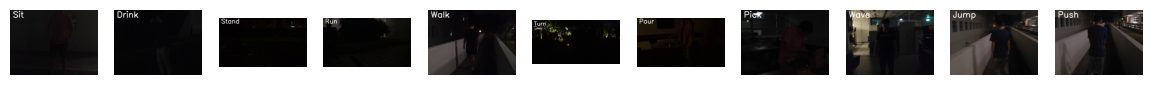

In [33]:
# plt.figure()
plt.figure(figsize = (20, 20))
# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir(PATH)



# Generate a list of 20 random values. The values will be between 0-50,
# where 50 is the total number of class in the dataset.
random_range = random.sample(range(len(all_classes_names)),11)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(PATH+f'/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(PATH+f'/{selected_class_Name}/{selected_video_file_name}')

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame.
    plt.subplot(7, 15 ,counter);plt.imshow(rgb_frame);plt.axis('off')

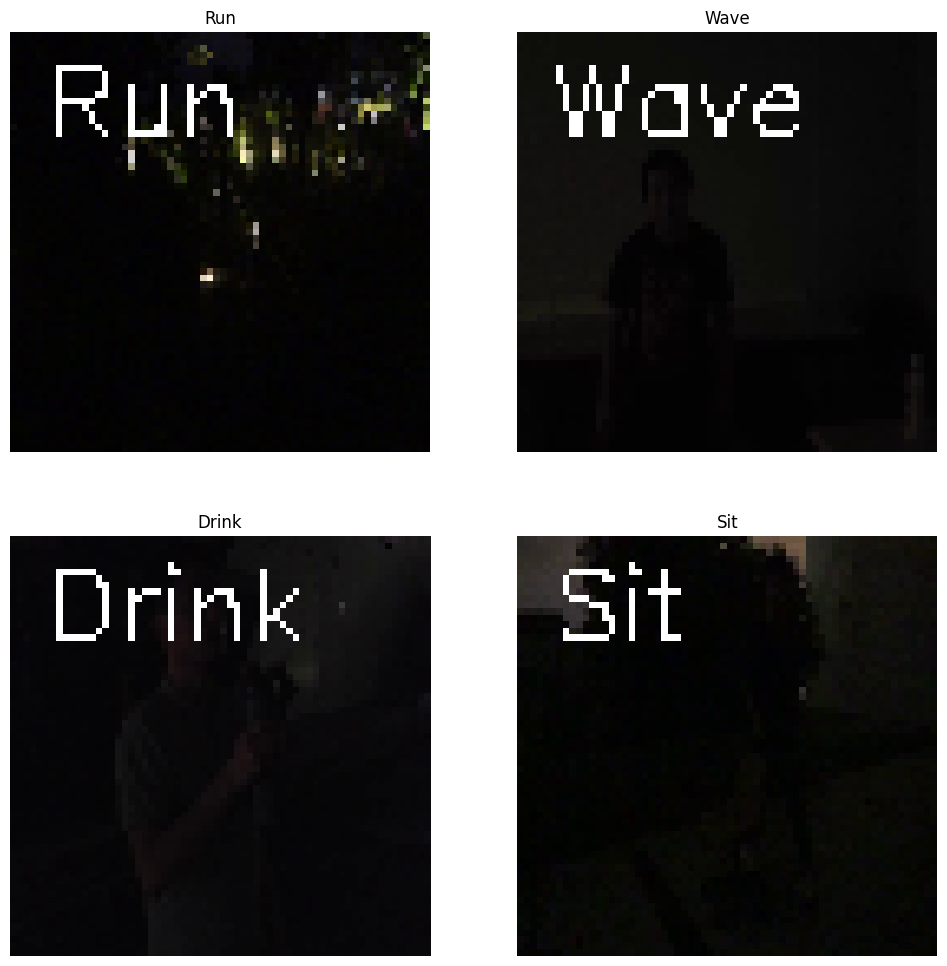

In [47]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Assuming PATH is the directory containing class folders
PATH=r'C:\Users\Hp\Documents\Design Project\clips_v1.5'

plt.figure(figsize=(12, 12))

# Get the names of all classes/categories in the dataset.
all_classes_names = os.listdir(PATH)

# Generate a list of 4 random values. The values will be between 0-50,
# where 50 is the total number of classes in the dataset.
random_range = random.sample(range(len(all_classes_names)), 4)

# Define the desired width and height for the resized image
resized_width, resized_height = 64, 64

# Iterating through the four randomly selected classes.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_name = all_classes_names[random_index]

    # Construct the path to the class directory
    class_dir_path = os.path.join(PATH, selected_class_name)

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(class_dir_path)

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Construct the path to the selected video file
    video_file_path = os.path.join(class_dir_path, selected_video_file_name)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(video_file_path)

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Resize the frame to the desired dimensions
    resized_frame = cv2.resize(rgb_frame, (resized_width, resized_height))

    # Write the class name on the resized frame.
    cv2.putText(resized_frame, selected_class_name, (5, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Display the resized frame.
    plt.subplot(2, 2, counter)
    plt.imshow(resized_frame)
    plt.title(selected_class_name)
    plt.axis('off')

plt.show()


In [42]:
all_classes_names

['Drink',
 'Jump',
 'Pick',
 'Pour',
 'Push',
 'Run',
 'Sit',
 'Stand',
 'Turn',
 'Walk',
 'Wave']

In [38]:
#  Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 10

# Specify the directory containing the UCF50 dataset.
DATASET_DIR = PATH

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ['Drink','Jump']

In [20]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []

    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # Return the frames list.
    return frames_list

In [21]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []

    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):

        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')

        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Iterate through all the files present in the files list.
        for file_name in files_list:

            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)

    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [22]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: Drink
Extracting Data of Class: Jump


In [23]:
one_hot_encoded_labels = to_categorical(labels)

In [24]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

In [25]:
tf.config.list_physical_devices("device_type=GPU")

[]

In [26]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
        #model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Flatten()))

    model.add(GRU(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

    # Return the constructed LRCN model.
    return model

In [27]:
strategy=tf.distribute.MirroredStrategy()
with strategy.scope():
  LRCN_model = create_LRCN_model()
# Start training the model.
  LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 64 ,  shuffle = True, validation_split = 0.2)
# Construct the required LRCN model.


# Display the success message.
print("Model Created Successfully!")


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 10, 64, 64, 16)    448       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 16, 16, 16)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 16, 16, 16)    0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 10, 16, 16, 32)    4640      
 stributed)                                                      
                  

In [28]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''

    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))
    plt.autoscale(True)
    # Add legend to the plot.
    plt.legend()

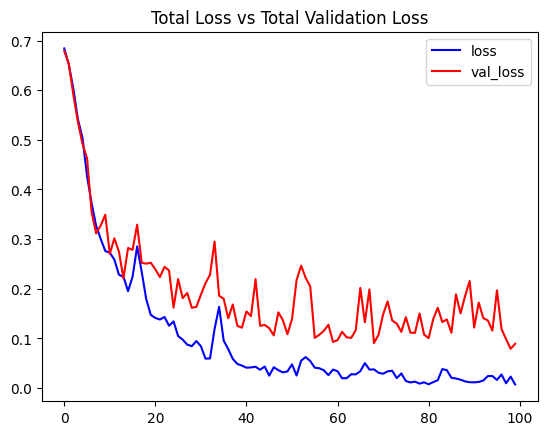

In [36]:
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

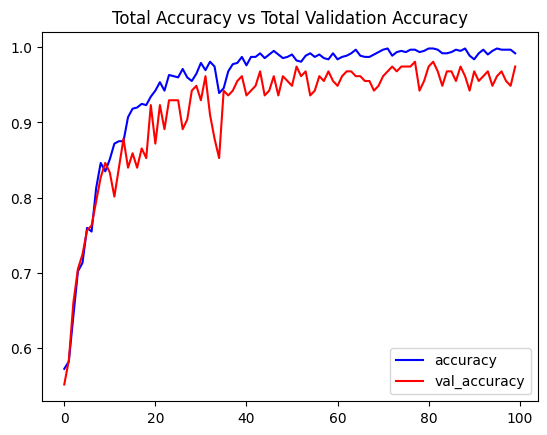

In [25]:
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


In [26]:
y_pred=LRCN_model.predict(features_test)
predicted_classes=[]
for i in range(len(labels_test)):
    predicted_classes.append(np.argmax(y_pred[i]))


9/9 [==============================] - 3s 43ms/step


In [30]:
y_true=[]
for i in range(len(labels_test)):
    y_true.append(np.argmax(labels_test[i]))


In [31]:
from sklearn.metrics import accuracy_score
print("Test Accuracy",accuracy_score(y_true,predicted_classes))

NameError: name 'predicted_classes' is not defined

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
# cm=confusion_matrix(y_true,predicted_classes)
disp=ConfusionMatrixDisplay.from_predictions(y_true,predicted_classes,display_labels=CLASSES_LIST,xticks_rotation=90,normalize='true')
fig=disp.figure_
ax=disp.ax_
fig.set_figwidth(60)
fig.set_figheight(60)
ax.set_title("GRU SEQ LENGTH 10 64*64 ADAM EPOCHS 300",fontsize=50)

NameError: name 'predicted_classes' is not defined